## iQPE for protein folding problem

In [1]:
from math import cos, sin
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit_algorithms import IterativePhaseEstimation, TimeEvolutionProblem, TrotterQRTE
from qiskit.primitives import Sampler

### Step 1: Get the unitary representing the Hamiltonian

#### This is the Hamiltonian as a sum of Pauli ops that I obtained from the ProteinFoldingProblem for a peptide of length 5

In [2]:
labels = ["III", "ZII", "IZZ", "ZZZ"]
coefs = [2.5, -2.5, 2.5, -2.5]
H = SparsePauliOp(labels, coefs)
print("hamiltonian", H)
initial_state = Statevector.from_label("000")
# initial_state = QuantumCircuit(3)
final_time = 1

hamiltonian SparsePauliOp(['III', 'ZII', 'IZZ', 'ZZZ'],
              coeffs=[ 2.5+0.j, -2.5+0.j,  2.5+0.j, -2.5+0.j])


#### Define a TimeEvolutionProblem and evolve it using TrotterQRTE to get a unitary operator, evolved_state

trotter_qrte is a: <class 'qiskit_algorithms.time_evolvers.time_evolution_result.TimeEvolutionResult'>
evolved_state is a : <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>


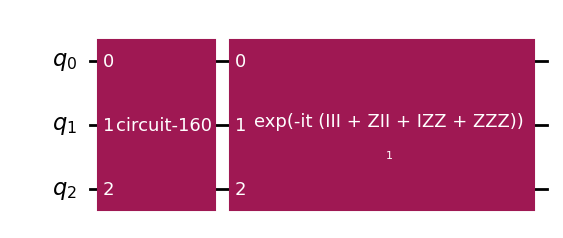

In [3]:
tep = TimeEvolutionProblem(H, initial_state=initial_state, time=final_time)
trotter_qrte = TrotterQRTE().evolve(tep)
print("trotter_qrte is a:", type(trotter_qrte))
evolved_state = trotter_qrte.evolved_state
print("evolved_state is a :", type(evolved_state))
evolved_state.draw("mpl")

In [4]:
# H is not unitary, just checking to make sure
m = H.to_matrix()
H_is_unitary = np.allclose(np.eye(len(m)), m.dot(m.T.conj()))
print("Is H unitary?", H_is_unitary)

Is H unitary? False


In [5]:
# Can't convert the QuantumCircuit, evolved_state, to a gate, getting error msg "circuit-160" is not a gate instruction'
# esg = evolved_state.to_gate()
# print(type(esg))

### Step 2: Would like to try iQPE on the Hamiltonian

In [6]:
num_iterations = 3
sampler = Sampler()
ipe = IterativePhaseEstimation(num_iterations, sampler)
unitary = evolved_state
ansatz = QuantumCircuit(3)
result = ipe.estimate(unitary, ansatz)
result

CircuitError: 'The circuit contains non-unitary operations and cannot be controlled. Note that no qiskit.circuit.Instruction objects may be in the circuit for this operation.'